In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

sess = tf.Session()
iris = datasets.load_iris()
boston = datasets.load_boston()
x_vals = boston.data[:,5]
y_vals = boston.target

In [2]:
learning_rate = 0.01
batch_size = 506
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [4]:
loss = tf.reduce_mean(tf.abs(y_target - model_output))
my_opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [5]:
loss_vec = []

for i in range(1000):
    rand_index = np.random.choice(x_vals.shape[0], size=batch_size)
    #print(x_vals[rand_index,:].shape)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #100 A = [[ 3.15524054]]b = [[ 0.9331646]]
Loss = 5.53884
Step #200 A = [[ 3.36562371]]b = [[ 0.92178142]]
Loss = 5.94007
Step #300 A = [[ 3.35750341]]b = [[ 0.87423223]]
Loss = 5.47499
Step #400 A = [[ 3.38990211]]b = [[ 0.83261198]]
Loss = 5.46844
Step #500 A = [[ 3.37708473]]b = [[ 0.78454912]]
Loss = 5.38711
Step #600 A = [[ 3.39543319]]b = [[ 0.74067557]]
Loss = 5.41961
Step #700 A = [[ 3.39703465]]b = [[ 0.69474655]]
Loss = 5.53179
Step #800 A = [[ 3.4024756]]b = [[ 0.64865965]]
Loss = 5.6986
Step #900 A = [[ 3.41835666]]b = [[ 0.60541862]]
Loss = 5.43463
Step #1000 A = [[ 3.40587449]]b = [[ 0.55735534]]
Loss = 5.02441


In [6]:
#sess.run(init)
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

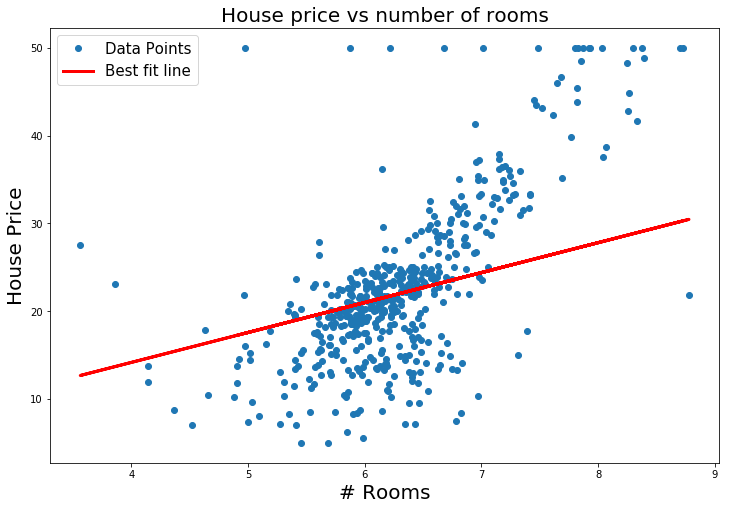

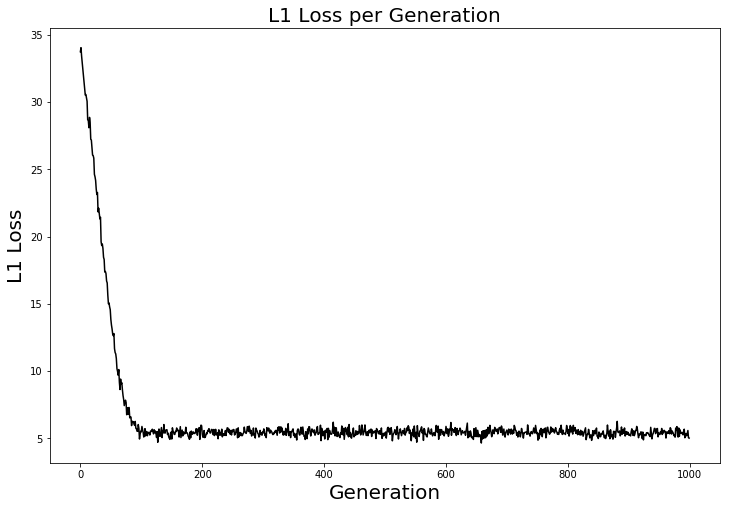

In [7]:
plt.figure(figsize=[12,8])
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left',fontsize=15)
plt.title('House price vs number of rooms', fontsize=20)
plt.xlabel('# Rooms', fontsize=20)
plt.ylabel('House Price', fontsize=20)
plt.show()


plt.figure(figsize=[12,8])
plt.plot(loss_vec, 'k-')
plt.title('L1 Loss per Generation', fontsize=20)
plt.xlabel('Generation', fontsize=20)
plt.ylabel('L1 Loss', fontsize=20)
plt.show()